<a href="https://colab.research.google.com/github/hoang20130267/Machine-Learning-20130267/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Website Phishing



###Thành viên nhóm:

1. Nguyễn Sĩ Hoàng - 20130267
2. Nguyễn Huy Hiệp - 20130258

# 1. Giới thiệu
##1.1 Giới thiệu chung
- Vấn đề lừa đảo được coi là vấn đề sống còn trong ngành ngân hàng điện tử và thương mại điện tử chiếm số lượng giao dịch trực tuyến liên quan đến thanh toán.
- Tập dữ liệu đã xác định các đặc điểm khác nhau liên quan đến các trang web hợp pháp và lừa đảo, đồng thời thu thập 1353 trang web khác nhau từ các nguồn khác nhau. Các trang web lừa đảo được thu thập từ kho lưu trữ dữ liệu Phishtank (www.phishtank.com), một trang web cộng đồng miễn phí nơi người dùng có thể gửi, xác minh, theo dõi và chia sẻ dữ liệu lừa đảo. Các trang web hợp pháp được thu thập từ Yahoo và các thư mục điểm bắt đầu bằng cách sử dụng tập lệnh web được phát triển bằng PHP. Tập lệnh PHP đã được đưa vào vào trình duyệt và đã thu thập được 548 trang web hợp pháp trong số 1353 trang web. Có 702 URL lừa đảo và 103 URL đáng ngờ.
- Khi một trang web được coi là ĐÁNG NGỜ, điều đó có nghĩa là trang web đó có thể là lừa đảo hoặc là hợp pháp.

- Các thuộc tính trong bộ dữ liệu này bao gồm:
  1. SFH(Story Fake Hacking): là một kỹ thuật lừa đảo mà kẻ tấn công sử dụng để đánh lừa người dùng tin rằng họ đã bị hack vào tài khoản của mình. Kỹ thuật này thường được sử dụng để cướp thông tin cá nhân và tài khoản của người dùng.
  2. Pop Up Window: Các pop up có nguy cơ lừa đảo ở trong trang web
  3. SSLfinal State: là trạng thái của kết nối SSL (Secure Sockets Layer) giữa trình duyệt của người dùng và trang web. SSL là một phương thức mã hóa dữ liệu để đảm bảo tính bảo mật khi truyền thông tin giữa trình duyệt và trang web.
  4. Request URL: là một thành phần của một yêu cầu HTTP gửi từ trình duyệt của người dùng đến máy chủ web.
  5. URL of Anchor: là một thành phần của một liên kết (link) trên trang web, chứa địa chỉ URL của trang web được liên kết đến.
  6. Web Traffic: là lưu lượng truy cập trang web, bao gồm số lượng truy cập và lượt xem của người dùng trên một trang web trong một khoảng thời gian nhất định.
  7. URL Length: là số lượng ký tự trong một URL, bao gồm các thông tin như tên miền, đường dẫn và các tham số truy vấn.
  8. Age of Domain: là thời gian kể từ khi tên miền được đăng ký lần đầu tiên. 
  9. Having IP Address: Khi một trang web được tạo ra, kẻ tấn công cần phải có một địa chỉ IP để đăng ký tên miền hoặc lưu trữ trang web đó.
  10. Result: Kết luận trang web đó có lừa đảo hay không.

  *Các thuộc tính(trừ thuộc tính id) được thu thập giữ các giá trị phân loại , "Hợp pháp(Legit)", "Đáng ngờ(Suspicious)" và "Lừa đảo(Phisy)", các giá trị này đã được thay thế bằng các giá trị số 1,0 và -1 tương ứng.*


## 1.2. Kiểm tra dữ liệu
Dữ liệu tiền xử lý được lưu ở file **PhishingData.csv**. Tiếp theo ta sẽ kiểm tra phân bố của dữ liệu, các vấn đề của dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

phishing = pd.read_csv('PhishingData.csv')
# Bỏ id vì nó không cần thiết
phishing = phishing.drop(['id'], axis=1)
# Thông tin sơ bộ của 10 đặc trưng
phishing.info()
# Kiểm tra biến phân lớp Result
print(phishing['Result'].value_counts())
# Lấy ra danh sách các đặc trưng định lượng
numberical = phishing.drop(columns=['Result']).select_dtypes(include=np.number).columns.tolist()
print(numberical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB
-1    702
 1    548
 0    103
Name: Result, dtype: int64
['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address']


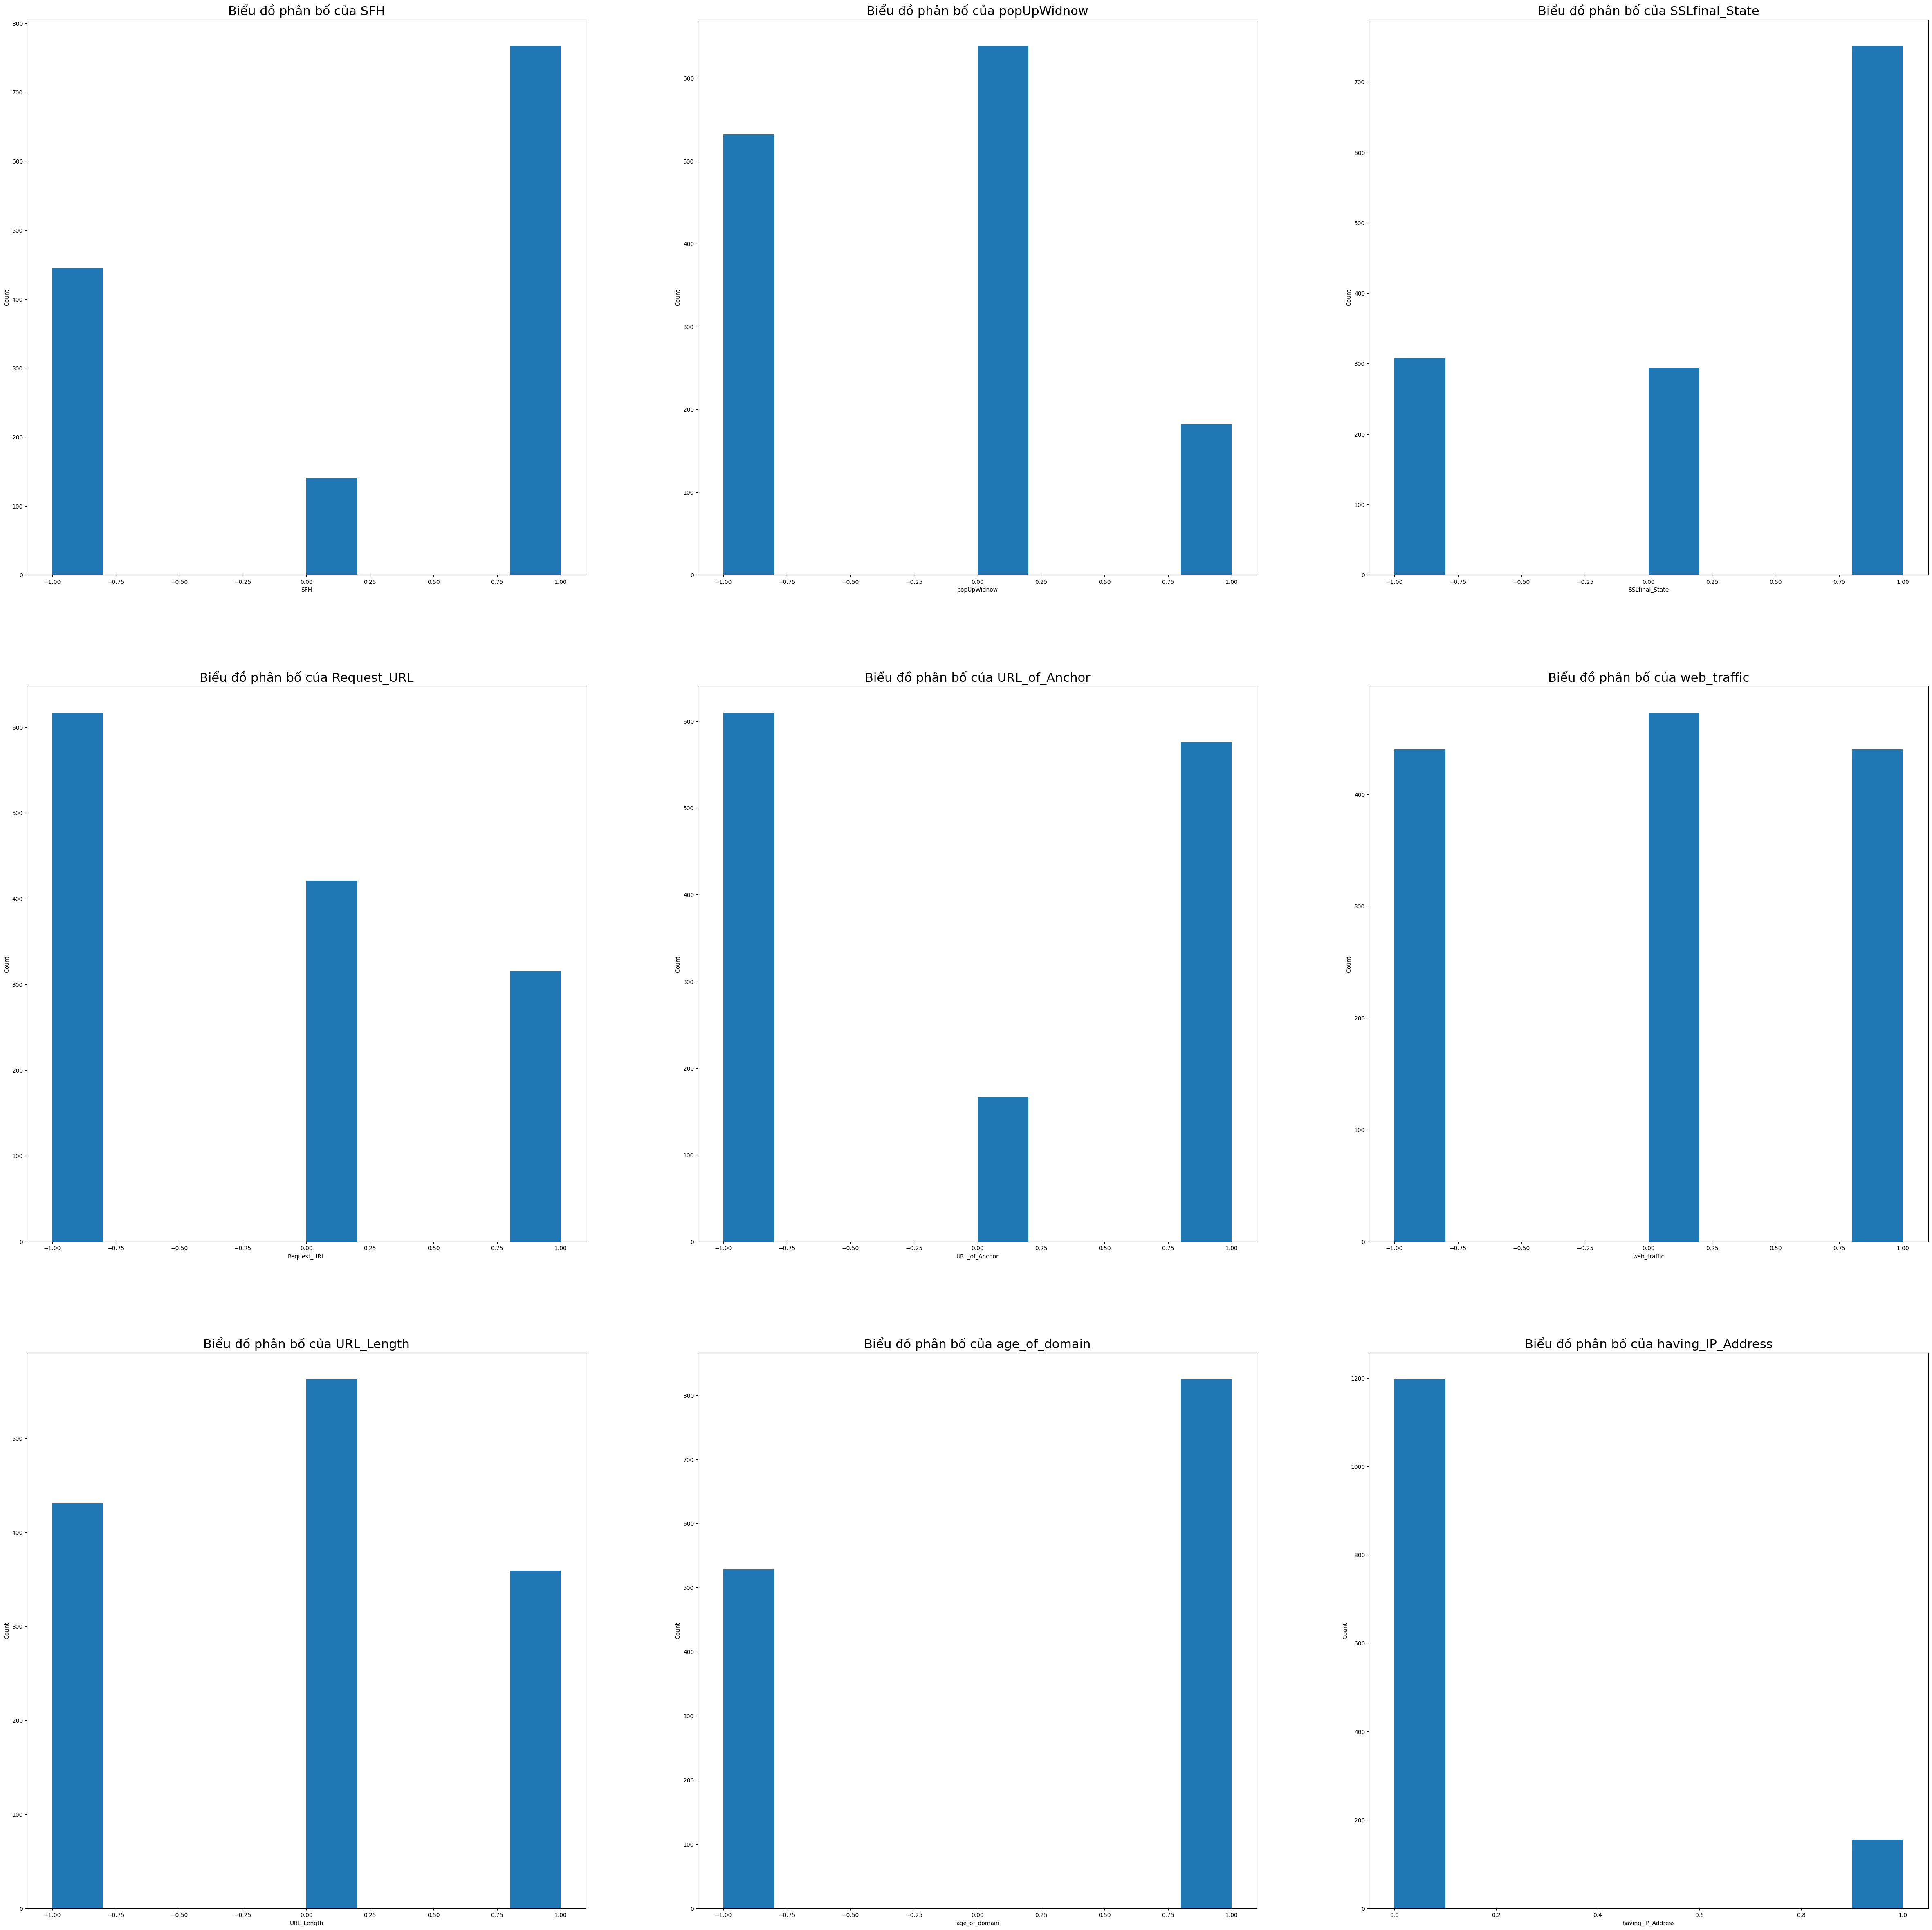

In [ ]:
# Vẽ biểu đồ cột của 9 đặc trưng định lượng
fig, axs = plt.subplots(3, 3, figsize=(60,60))
for ax, col in zip(axs.flat, numberical):
  ax.hist(phishing[col], bins=10)
  ax.set(xlabel=col, ylabel="Count")
  ax.set_title(f"Biểu đồ phân bố của {col}",  fontsize=22, pad=8)

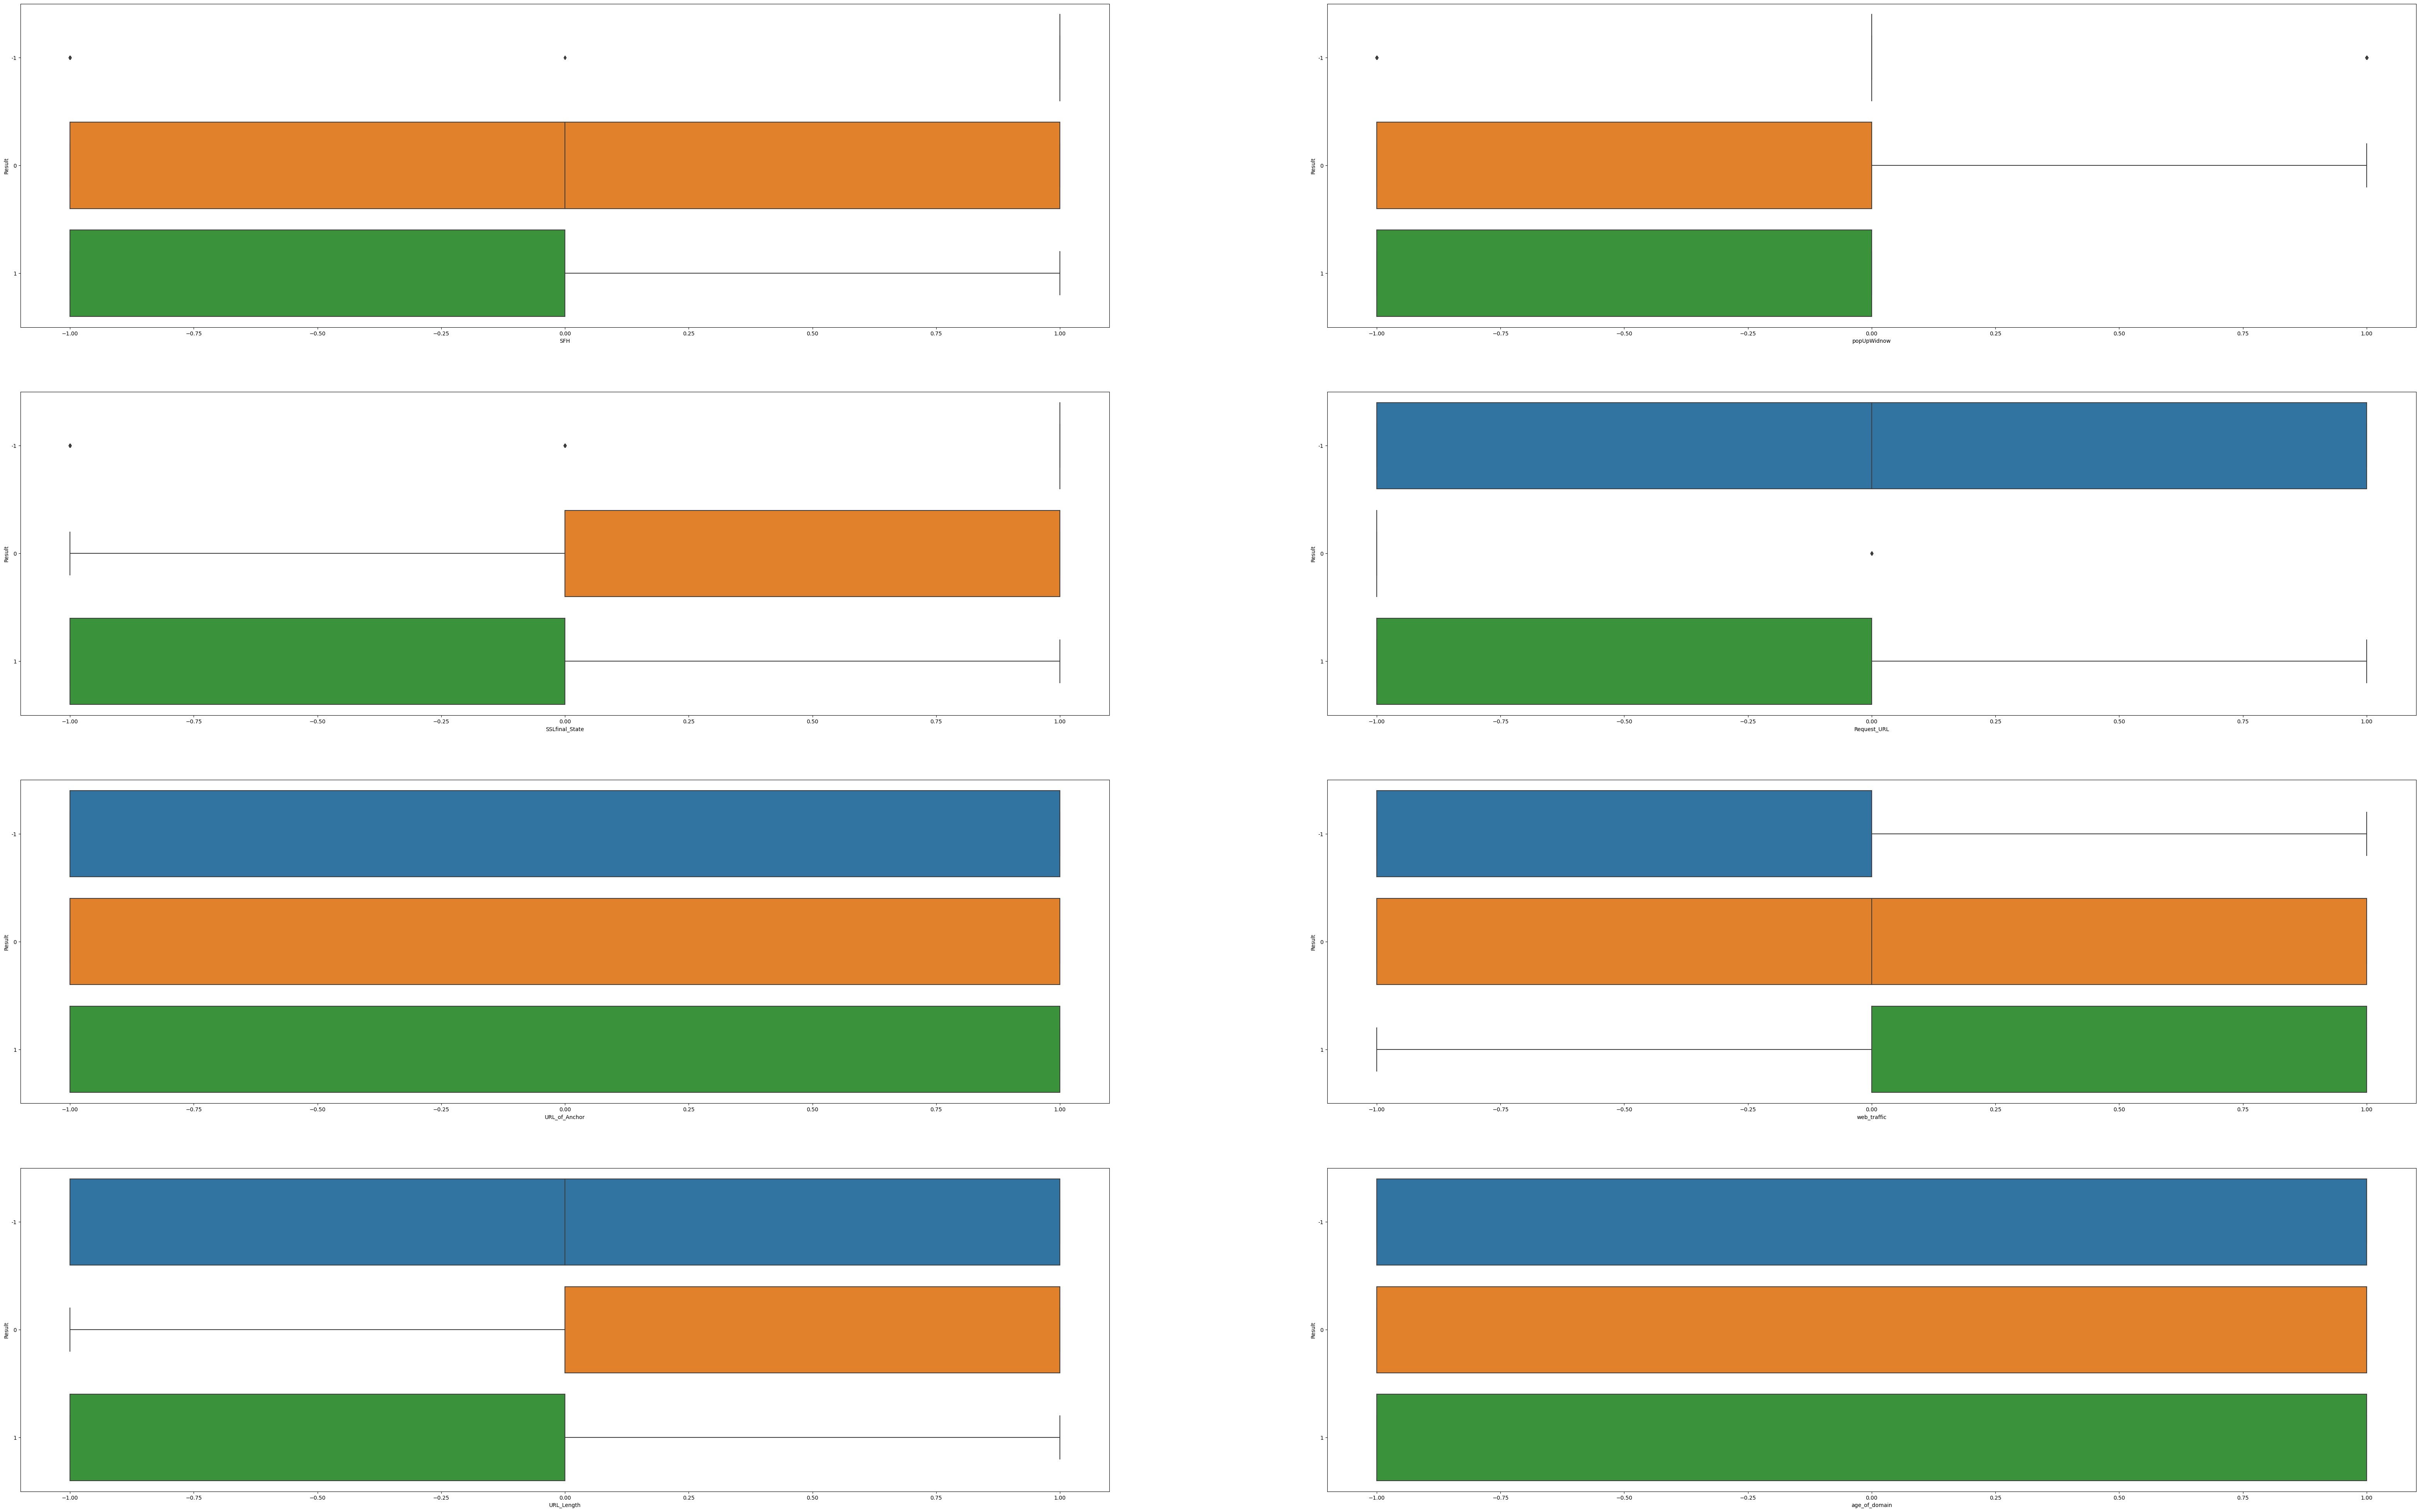

In [ ]:
# Vẽ biểu đồ hộp của 9 đặc trưng định lượng, thể hiện quan hệ giữa chúng với biến phân lớp
fig, axs = plt.subplots(4, 2, figsize=(80,50))
for ax, col in zip(axs.flat, numberical):
  sns.boxplot(ax=ax, x=col, y="Result", data=phishing, orient='h')

#2. Tiền xử lý dữ liệu
##2.1. Xử lý dữ liệu 
- Kiểm tra và loại bỏ các giá trị bị thiếu trong tập dataset.
- Chuyển đổi quy mô dữ liệu.
- Chuyển đổi phân phối dữ liệu.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Kiểm tra trong dataset có bị thiếu dữ liệu không
print(phishing.isnull().sum())

SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64


##2.2. Trích chọn đặc trưng
Sử dụng phương pháp Mutual Information thông qua hàm mutual_info_classif của sklearn vì phương pháp này phù hợp cho biến định lượng. Trích xuất tổng cộng 9 đặc trưng từ bộ dữ liệu sau quá trình lựa chọn

>Threshold=0.00, Features=9
>Threshold=0.05, Features=9
>Threshold=0.10, Features=9
>Threshold=0.15, Features=8
>Threshold=0.20, Features=8
>Threshold=0.25, Features=8
>Threshold=0.30, Features=8
>Threshold=0.35, Features=8
>Threshold=0.40, Features=8
>Threshold=0.45, Features=8


<ipython-input-10-1c8ba4b88587>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_num = df[num_columns].values.astype(np.float)


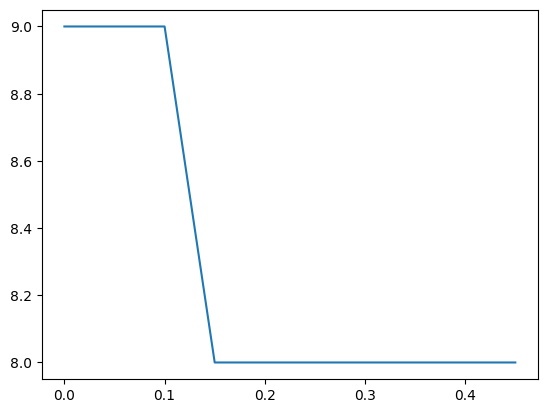

In [ ]:
df = pd.read_csv('PhishingData.csv')

# Chuyển đổi các biến định lượng
num_columns = ['SFH', 'popUpWidnow','SSLfinal_State', 'Request_URL','URL_of_Anchor','web_traffic','URL_Length','age_of_domain','having_IP_Address']
X_num = df[num_columns].values.astype(np.float)

from sklearn.feature_selection import VarianceThreshold

thresholds = np.arange(0.0, 0.5, 0.05)
results = list()

for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    # Biến đổi dữ liệu đầu vào
    X_sel = transform.fit_transform(X_num)
    # Xác định số lượng đặc trưng đầu vào
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    results.append(n_features)
    
# Vẽ biểu đồ threshold so với số lượng đặc trưng được chọn
plt.plot(thresholds, results)
plt.show()

In [ ]:
# Tạo các transformer cho các cột dữ liệu số
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numberical),
    ])

# Tạo pipeline để kết hợp các bước chuyển đổi và trích chọn đặc trưng
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(mutual_info_classif, k=8))
])

# Áp dụng pipeline cho tập dữ liệu
X = phishing.drop(['Result'], axis=1)
y = phishing['Result']

X_selected = pipe.fit_transform(X, y)

#3. Xây dựng mô hình và đánh giá kết quả
Sau khi đã tiền xử lý dữ liệu, bước tiếp theo là xây dựng các mô hình để dự đoán số trang web lừa đảo dựa trên các mẫu dữ liệu.

Các thuật toán sẽ được sử dụng để xây dựng mô hình bao gồm:

1. SVM
2. kNN 
3. Naïve Bayes
4. RandomForest
5. Decision Tree
6. Neural Network

Chúng ta sẽ tạo một hàm tổng quát nhận vào thuật toán phân loại để sử dụng cho các thuật toán khác nhau. Các bước trong hàm sẽ được thực hiện như sau:
 - Bước 1: Lấy dữ liệu từ **X_selected** và **y** đã qua xử lý.
 - Bước 2: Phân chia tập dữ liệu thành các tập test và train với 25% cho test và train là 75%, bảo tồn tỷ lệ phân lớp (stratify=y) với hàm train_test_split.
 - Bước 3: Khởi tạo mô hình và truyền thuật toán phân loại thông qua tham số clf (classifier) của hàm.
 - Bước 4: Đánh giá mô hình bằng Cross Validation trên tập train:
  - Đánh giá theo Accuracy (Độ chính xác tổng quát), Precision (Độ chính xác), Recall (Độ nhạy), F1.
  - Sử dụng 5-fold Cross Validation, lặp lại quá trình 3 lần và đảm bảo tỷ lệ phân lớp được bảo toàn (sử dụng lớp RepeatedStratifiedKFold trong sklearn). (Phương pháp này có hiệu suất tốt và được khuyến nghị hơn so với KFold).*.
  - Thực hiện kiểm chứng mô hình trên tập train, kết quả đánh giá được lưu vào tệp **clf_cv_scores.csv** để sử dụng so sánh giữa các mô hình.
 - Bước 5: Train model và dùng model để dự đoán trên tập test.
 - Bước 6: Đánh giá kết quả dự đoán của model trên tập test:
  - Đánh giá Accuracy (Độ chính xác tổng quát), Precision (Độ chính xác), Recall (Độ nhạy), F1.
  - Lưu kết quả đánh giá vào tệp **clf_model_scores.csv**.
  - Vẽ biểu đồ hộp cho 4 hệ số đánh giá từ kết quả cross validation trên tập train.
  - Vẽ Confusion Matrix cho kết quả dự đoán của mô hình trên tập test.

In [ ]:
from matplotlib import axis
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, stratify=y, random_state=0)

def build_and_eval_model(clf):
  
    # Đánh giá model bằng Cross-Validation trên Training Set
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
    cv_scores = pd.DataFrame(scores).iloc[:, 2:]
    print('A. Cross Validation with train set')
    print(cv_scores.describe())

    # Huấn luyện model
    clf.fit(X_train, y_train)
    # Dùng mô hình dự đoán trên Test Set
    y_pred = clf.predict(X_test)
    # Đánh giá kết quả dự đoán của mô hình trên Test Set
    final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test, y_pred)],
                                 'precision': [precision_score(y_test, y_pred, average='macro')],
                                 'recall': [recall_score(y_test, y_pred, average='macro')],
                                 'f1': [f1_score(y_test, y_pred, average='macro')]})
    print('B. Final Validation with test set')
    print(final_scores.to_string(index=False))

    #  Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(data=cv_scores, orient="h", palette="Set2", ax=axs[0])
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot(ax=axs[1])
    plt.show()

    # Lưu kết quả đánh giá
    cv_scores.to_csv('{}_cv_scores.csv'.format(clf.__class__.__name__), index=False)
    final_scores.to_csv('{}_final_scores.csv'.format(clf.__class__.__name__), index=False)

## SVM

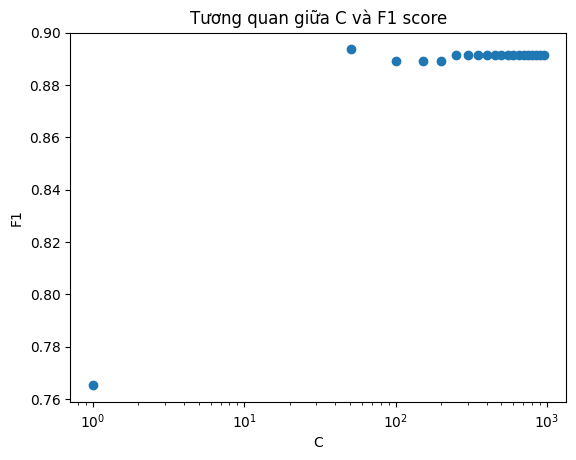

Giá trị C tốt nhất: 51


In [ ]:
from sklearn import svm

# Kiểm tra trong khoảng từ 1 đến 1000 với bước nhảy mỗi lần là 50
C_range = np.arange(start=1, stop=1000, step=50)

# Lưu giá trị C và F1 tương ứng
C_list = []
f1_list = []

for C in C_range:
    clf = svm.SVC(C=C)
    clf.fit(X_train, y_train)
    # Tính toán F1 score trên tập kiểm tra
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    # Lưu giá trị C và F1 score
    C_list.append(C)
    f1_list.append(f1)

# Vẽ biểu đồ tương quan giữa C và F1
plt.plot(C_list, f1_list, 'o', linestyle='')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1')
plt.title('Tương quan giữa C và F1 score')
plt.show()

# Chọn giá trị C tốt nhất
best_C = C_list[np.argmax(f1_list)]
print('Giá trị C tốt nhất:', best_C)

A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.871796              0.829897           0.816519       0.819900
std         0.015490              0.029324           0.041473       0.032295
min         0.841584              0.768378           0.718080       0.736394
25%         0.862069              0.818775           0.805405       0.805174
50%         0.876847              0.832186           0.819880       0.818244
75%         0.881773              0.842878           0.845557       0.843375
max         0.896040              0.888044           0.873104       0.861417
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.902655   0.880643 0.908638 0.893585


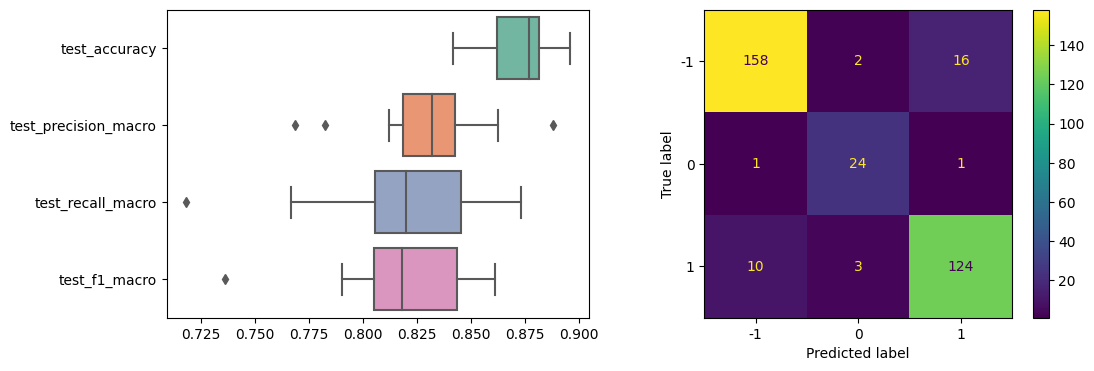

In [ ]:
clf = svm.SVC(C=51)
build_and_eval_model(clf)

## kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

grid = GridSearchCV(knn, param_grid, cv=20, scoring='accuracy')
grid.fit(X_train, y_train)

print("k tốt nhất: ", grid.best_params_['n_neighbors'])
print("accuracy tốt nhất: ", grid.best_score_)

k tốt nhất:  7
accuracy tốt nhất:  0.859843137254902


A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.854701              0.801489           0.711800       0.733745
std         0.018458              0.052473           0.042577       0.045621
min         0.816832              0.699294           0.640318       0.647197
25%         0.842365              0.785336           0.681045       0.703462
50%         0.857143              0.800686           0.713807       0.737863
75%         0.871604              0.818667           0.748092       0.768093
max         0.876238              0.911843           0.765510       0.803188
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.864307   0.832914 0.762746 0.788361


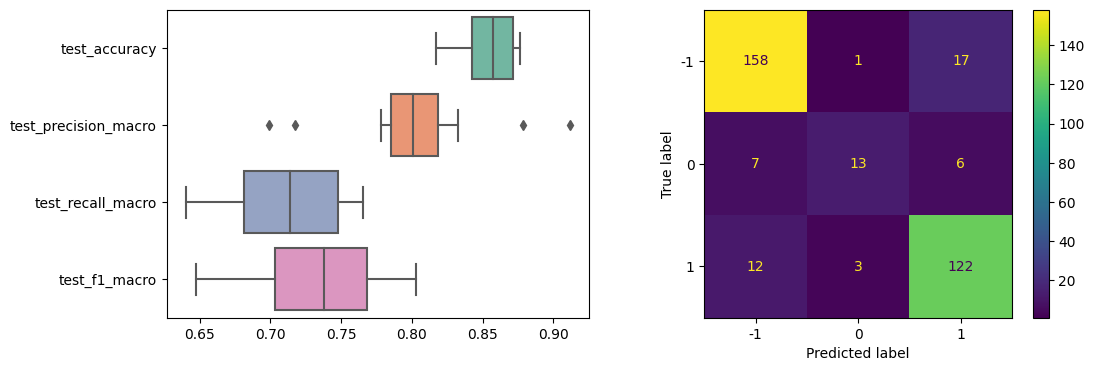

In [ ]:
clf = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
build_and_eval_model(clf)

## Naïve Bayes (GaussianNB)

A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.825450              0.691555           0.646979       0.655647
std         0.019288              0.052743           0.030108       0.037188
min         0.783251              0.593690           0.590713       0.586471
25%         0.817283              0.649507           0.621262       0.625630
50%         0.827586              0.713960           0.649962       0.664093
75%         0.839901              0.721494           0.668745       0.681167
max         0.856436              0.786136           0.692978       0.705812
B. Final Validation with test set
 accuracy  precision   recall       f1
  0.79941   0.662376 0.629354 0.637331


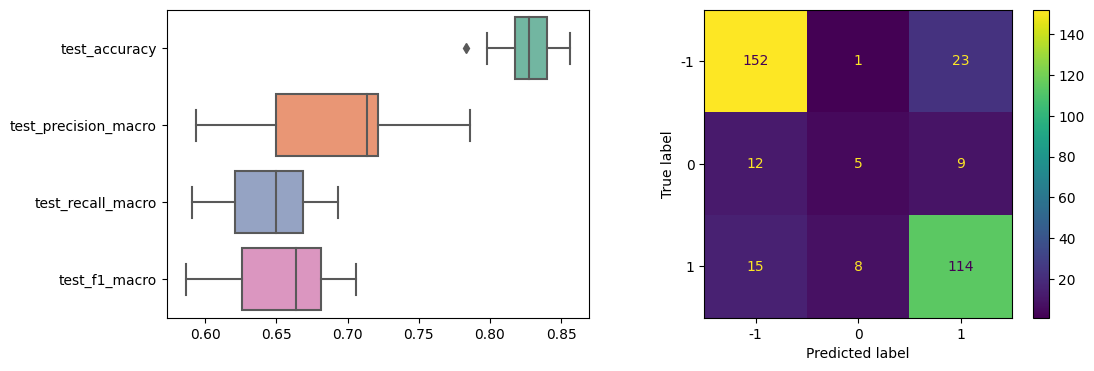

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
build_and_eval_model(clf)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rf = RandomForestClassifier()

clf = GridSearchCV(estimator= rf, param_grid=param_grid)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

rf_accuracy_score = accuracy_score(y_test, clf_predict)
rf_precision_score = precision_score(y_test, clf_predict, average='macro')
rf_recall_score = recall_score(y_test, clf_predict, average='macro')
rf_f1_score = f1_score(y_test, clf_predict, average='macro')
rf_best_param = clf.best_params_
rf_bestscore = clf.best_score_
print(rf_best_param)
print(rf_bestscore)

{'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 50}
0.8550114617373067


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.850116              0.565850           0.611913       0.587703
std         0.017417              0.011546           0.012613       0.011943
min         0.822660              0.546619           0.593380       0.569041
25%         0.837438              0.558642           0.602823       0.579445
50%         0.857143              0.569059           0.613438       0.590647
75%         0.857143              0.569868           0.618719       0.592820
max         0.886139              0.589243           0.639489       0.612889
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.852507   0.566458 0.614742 0.589544


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


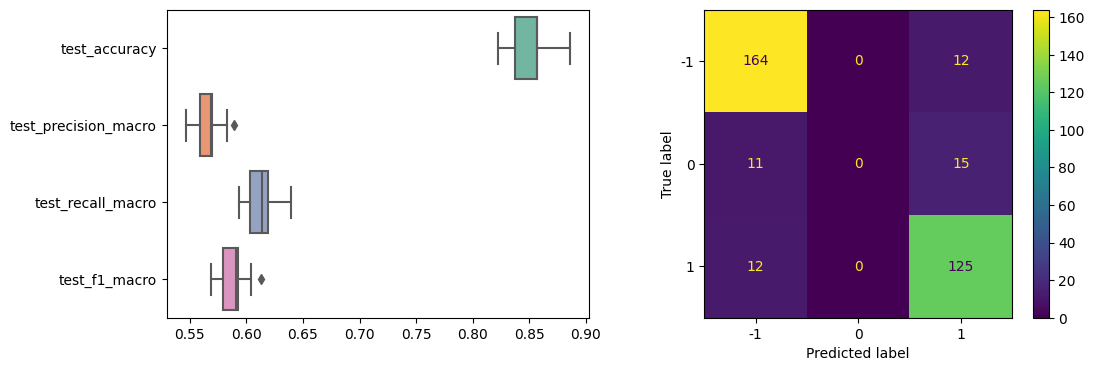

In [ ]:
clf = RandomForestClassifier(max_depth= 6, max_features='sqrt', max_leaf_nodes=9, n_estimators=25)
build_and_eval_model(clf)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

clf = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42}
0.885582597668634


A. Cross Validation with train set
       test_accuracy  test_precision_macro  test_recall_macro  test_f1_macro
count      15.000000             15.000000          15.000000      15.000000
mean        0.875093              0.830671           0.834801       0.829561
std         0.023571              0.044785           0.049148       0.043440
min         0.822660              0.742949           0.742586       0.755667
25%         0.859606              0.806350           0.798330       0.799698
50%         0.881773              0.839469           0.835188       0.831143
75%         0.886700              0.855448           0.881175       0.863184
max         0.910891              0.899526           0.893486       0.894095
B. Final Validation with test set
 accuracy  precision   recall       f1
 0.908555   0.901472 0.911887 0.906534


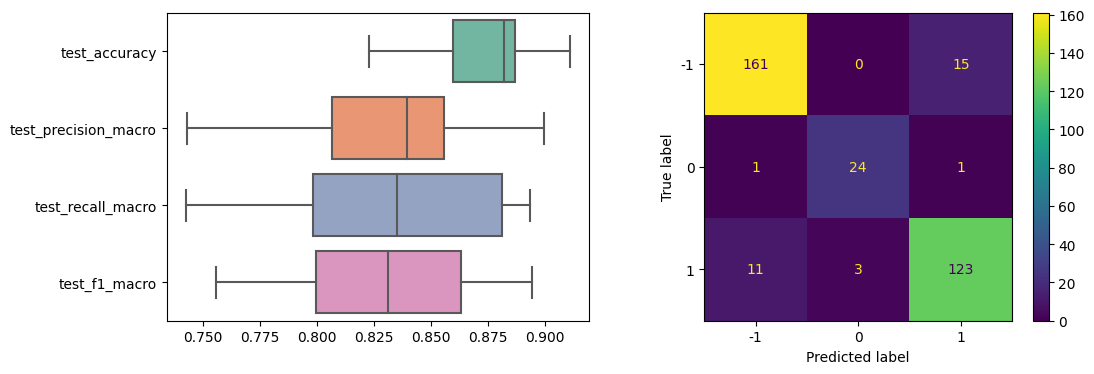

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=1, min_samples_split=5, random_state=42)
build_and_eval_model(clf)

##Neural Network 
Ta cũng sẽ sử dụng GridSearchCV để tìm hyperparameters tốt nhất cho thuật toán


In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV

input_dim = X_selected.shape[1]
num_classes=y.nunique()

In [ ]:
normalizer = Normalizer()

x = normalizer.fit_transform(X_selected)
y_numberical = keras.utils.to_categorical(y, num_classes)

from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y_numberical, test_size=0.25, stratify=y_numberical, random_state=0)

optimizer = ['Adam', 'SGD', 'RMSprop']
batch_size = [32,64,128]
epochs = [15,30,45,60]
param_grid = {"optimizer":optimizer, "batch_size":batch_size, "epochs":epochs}

#Tạo hàm trả về mô hình DNN đã biên dịch
def create_dnn_model():
  model = Sequential()
  model.add(Dense(250,input_dim=input_dim, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
  return model
  
#Sử dụng Keras wrapper để đóng gói model dưới dạng sklearn object
model = KerasClassifier(build_fn=create_dnn_model)

grid_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, refit=True)

grid_model.fit(X_train, y_train)
best_model = grid_model.best_estimator_
print(best_model)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/60
32/32 [==============================] - 1s 4ms/step - loss: 0.7616 - accuracy: 0.8057
Epoch 2/60
32/32 [==============================] - 0s 4ms/step - loss: 0.4546 - accuracy: 0.8422
Epoch 3/60
32/32 [==============================] - 0s 4ms/step - loss: 0.4094 - accuracy: 0.8393
Epoch 4/60
32/32 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.8521
Epoch 5/60
32/32 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8521
Epoch 6/60
32/32 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8659
Epoch 7/60
32/32 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8679
Epoch 8/60
32/32 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8708
Epoch 9/60
32/32 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8826
Epoch 10/60
32/32 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8826
Epoch 11/60
32/32 [

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report

# Xác định mô hình neural network
model = Sequential()
model.add(Dense(250, input_dim=X_selected.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Xác định phương thức cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Chạy train và đánh giá mô hình bằng cách sử dụng cross-validation
scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in cv.split(X_selected, y):
    X_train, X_test = X_selected[train_index], X_selected[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_integer_train = y_train.astype('category').cat.codes
    y_integer_test = y_test.astype('category').cat.codes

    y_train_cat = keras.utils.to_categorical(y_integer_train, num_classes=8)
    y_test_cat = keras.utils.to_categorical(y_integer_test, num_classes=8)

    model.fit(X_train, y_train_cat, epochs=60, batch_size=64, verbose=1)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    score = model.evaluate(X_test, y_test_cat, verbose=0)
    scores.append(score[1])

    report = classification_report(y_integer_test, y_pred_classes, output_dict=True)
    precision_scores.append(report['macro avg']['precision'])
    recall_scores.append(report['macro avg']['recall'])
    f1_scores.append(report['macro avg']['f1-score'])

results = pd.DataFrame({
    'test_accuracy': scores,
    'test_precision_macro': precision_scores,
    'test_recall_macro': recall_scores,
    'test_f1_macro': f1_scores
})

print(results)

results.to_csv('{}_cv_scores.csv'.format(model.__class__.__name__), index=False)

Epoch 1/60
17/17 [==============================] - 1s 2ms/step - loss: 1.2369 - accuracy: 0.6913
Epoch 2/60
17/17 [==============================] - 0s 3ms/step - loss: 0.5553 - accuracy: 0.8244
Epoch 3/60
17/17 [==============================] - 0s 4ms/step - loss: 0.4570 - accuracy: 0.8420
Epoch 4/60
17/17 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8438
Epoch 5/60
17/17 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8512
Epoch 6/60
17/17 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8595
Epoch 7/60
17/17 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8669
Epoch 8/60
17/17 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8669
Epoch 9/60
17/17 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8706
Epoch 10/60
17/17 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8799
Epoch 11/60
17/17 [

Epoch 1/60
16/16 [==============================] - 1s 5ms/step - loss: 0.8830 - accuracy: 0.7791
Epoch 2/60
16/16 [==============================] - 0s 4ms/step - loss: 0.5726 - accuracy: 0.8254
Epoch 3/60
16/16 [==============================] - 0s 4ms/step - loss: 0.4561 - accuracy: 0.8412
Epoch 4/60
16/16 [==============================] - 0s 5ms/step - loss: 0.4157 - accuracy: 0.8491
Epoch 5/60
16/16 [==============================] - 0s 3ms/step - loss: 0.3969 - accuracy: 0.8540
Epoch 6/60
16/16 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8619
Epoch 7/60
16/16 [==============================] - 0s 3ms/step - loss: 0.3675 - accuracy: 0.8580
Epoch 8/60
16/16 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.8639
Epoch 9/60
16/16 [==============================] - 0s 3ms/step - loss: 0.3425 - accuracy: 0.8639
Epoch 10/60
16/16 [==============================] - 0s 4ms/step - loss: 0.3294 - accuracy: 0.8728
Epoch 11/60
16/16 [

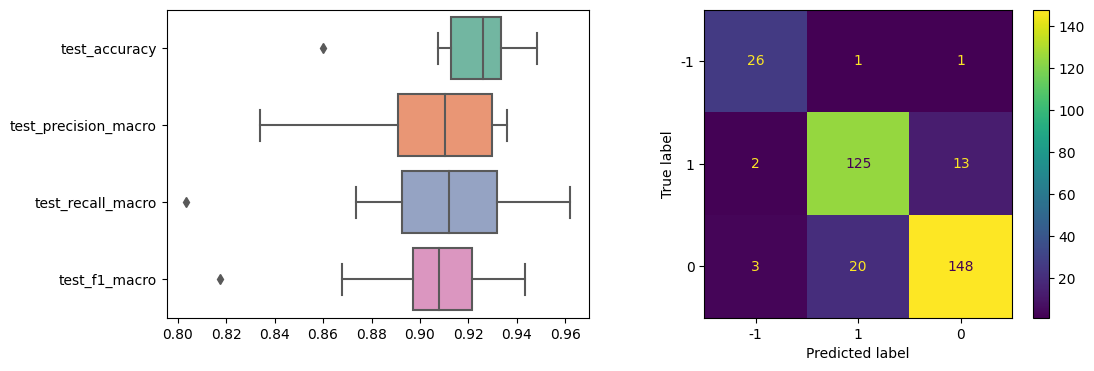

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

model = Sequential()
model.add(Dense(250,input_dim=input_dim, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

normalizer = Normalizer()

x = normalizer.fit_transform(X_selected)

y_numberical = keras.utils.to_categorical(y, num_classes)

X_train, X_test, y_train, y_test = train_test_split(x, y_numberical, test_size=0.25, random_state=0)

model.fit(X_train, y_train, epochs=60, batch_size=64, verbose=1)

score = model.evaluate(X_test, y_test)
print(score)

y_pred = model.predict(X_test)

y_pred_int = np.argmax(y_pred, axis=1)

y_test_int = np.argmax(y_test, axis=1)

# Đánh giá kết quả dự đoán của mô hình trên Test Set
final_scores = pd.DataFrame({'accuracy': [accuracy_score(y_test_int, y_pred_int)],
                                 'precision': [precision_score(y_test_int, y_pred_int, average='macro')],
                                 'recall': [recall_score(y_test_int, y_pred_int, average='macro')],
                                 'f1': [f1_score(y_test_int, y_pred_int, average='macro')]})


# Hiển thị kết quả đánh giá dưới dạng biểu đồ hộp và confusion matrix
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=results, orient="h", palette="Set2", ax=axs[0])

# Tính toán confusion matrix
cm = confusion_matrix(y_test_int, y_pred_int)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [-1,1,0])
disp.plot(ax=axs[1])
plt.show()

# Lưu kết quả đánh giá
final_scores.to_csv('{}_final_scores.csv'.format(model.__class__.__name__), index=False)

#4. Tổng kết
##4.1. So sánh kết quả đánh giá giữa các mô hình:
  - Vẽ biểu đồ hộp cho 4 hệ số đánh giá từ kết quả cross validation trên tập train của các mô hình.

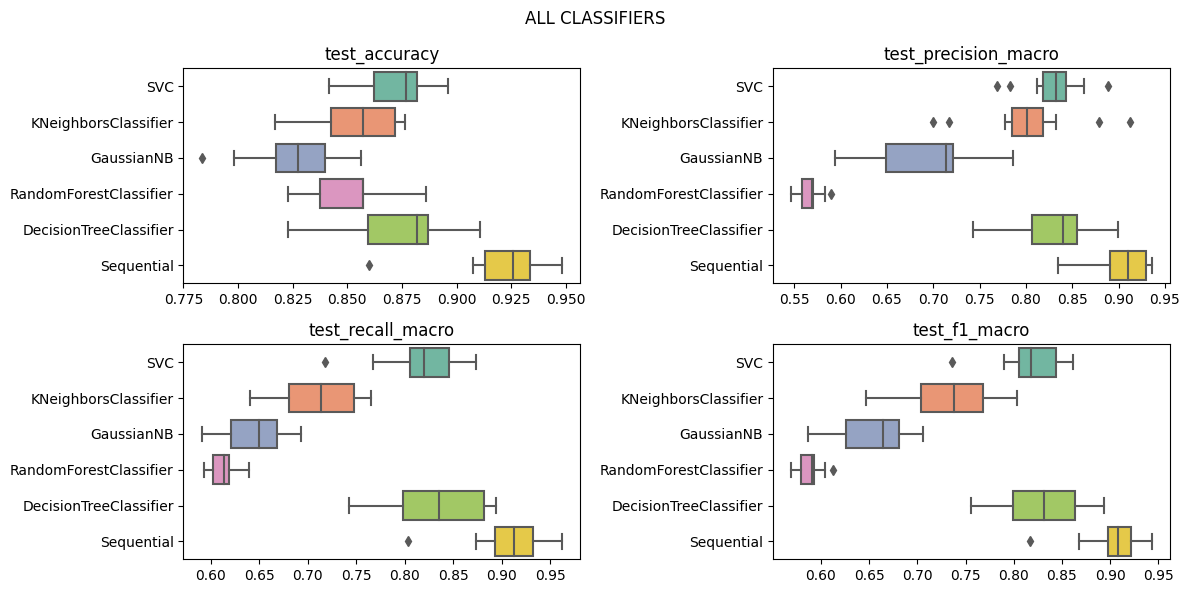

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
clf_names = ['SVC', 'KNeighborsClassifier', 'GaussianNB',
            'RandomForestClassifier', 'DecisionTreeClassifier', 'Sequential']
score_names = ['test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_macro']
def build_plots(title):
    model_cv_scores = {clf_name: pd.read_csv('{}_cv_scores.csv'.format(clf_name)) for clf_name in clf_names}
    fig, axs = plt.subplots(2,2, figsize=(12,6))

    for score_name, ax in zip(score_names, axs.flat):
        score_data = pd.DataFrame({clf_name: model_cv_scores[clf_name][score_name] for clf_name in clf_names})
        sns.boxplot(data=score_data, orient="h", palette="Set2", ax=ax)
        ax.set_title(score_name)
    
    fig.suptitle(title)
    plt.tight_layout()

# Vẽ biểu đồ cho tất cả clf
build_plots('ALL CLASSIFIERS')

##4.2. Kết luận

Nhìn vào 4 biểu đồ ở trên, có thể thấy được các thuật toán đều có sự chênh lệch hiệu quả khác nhau, cụ thể là:

- Accuracy khá cao ở tất cả mô hình và không chênh lệch nhau quá nhiều, trong đó nổi bật nhất là Neural network.

- Precision: Neural network tiếp tục là thuật toán có chỉ số cao nhất so với các thuật toán còn lại. Tiếp theo đó là thuật toán SVM và Decision Tree cũng có chỉ số cao và có thể áp dụng vào bài toán. Còn lại 3 thuật toán kia cần cải thiện Precision cao hơn để có khả năng áp dụng, nhất là thuật toán RandomForest

- Recall tương tự với hệ số trên thì Neural network của mô hình này cũng cao và 
 2 thuật toán SVM và Decision Tree hoạt động khá tốt ở Recall

- F1 cũng tương tự như Recall và Precision,  SVM và Decision Tree là 2 mô hình có chỉ số cao hơn hẳn những mô hình còn lại và chỉ số cao nhất vẫn thuộc về Neural network 

**Với những thông tin thu thập ở trên, ta thấy rằng thuật toán có tính ổn định và hiêu quả cao nhất là Neural network, theo ngay sau đó là SVM và Decision Tree là 2 thuật toán có độ ổn định cao và đồng đều trong tất cả các thuật toán và phù hợp để áp dụng vào việc xử lí bài toán. Còn đối với 3 thuật toán còn lại là kNN, Naïve Bayes và RandomForest thì các thông số đều rất thấp và kém hiệu quả, cần cải thiện thêm để đem lại hiệu quả khi áp dụng vào bài toán**